# Blockchain Stock Portfolio

https://www.investopedia.com/terms/b/blockchain.asp  
https://en.wikipedia.org/wiki/Blockchain    


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import math
from tabulate import tabulate
from scipy.stats import norm

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

import quantstats as qs

In [2]:
# input
symbols = ['COIN', 'NVDA', 'SQ', 'PYPL', 'ACN', 'IBM', 'SI']
start = '2021-11-01'
end = '2022-11-20'


# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  7 of 7 completed


,ACN,COIN,IBM,NVDA,PYPL,SI,SQ
Date,,,,,,,
2021-11-01 00:00:00-04:00,350.537811,330.989990,113.507439,258.063141,231.279999,190.339996,255.039993
2021-11-02 00:00:00-04:00,356.634644,336.339996,113.417542,263.798553,229.460007,203.660004,249.009995
2021-11-03 00:00:00-04:00,357.226532,344.380005,114.271469,265.766968,230.380005,222.130005,252.479996
2021-11-04 00:00:00-04:00,361.863281,344.450012,113.623474,297.771301,228.220001,215.960007,247.460007
2021-11-05 00:00:00-04:00,363.500946,337.049988,116.218437,297.281677,225.779999,215.160004,237.380005


In [3]:
df.tail()

,ACN,COIN,IBM,NVDA,PYPL,SI,SQ
Date,,,,,,,
2022-11-14 00:00:00-05:00,288.910004,53.220001,144.199997,162.949997,89.510002,35.490002,70.269997
2022-11-15 00:00:00-05:00,292.649994,55.529999,144.339996,166.660004,89.860001,29.360001,73.379997
2022-11-16 00:00:00-05:00,291.510010,48.830002,144.520004,159.100006,87.040001,31.340000,69.550003
2022-11-17 00:00:00-05:00,287.140015,48.790001,146.089996,156.770004,85.639999,27.900000,67.989998
2022-11-18 00:00:00-05:00,286.500000,45.259998,147.639999,154.089996,84.919998,24.900000,65.820000


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
1 years


In [5]:
from datetime import datetime

def calculate_years(start, end): 
    date_format = "%Y-%m-%d"
    a = datetime.strptime(start, date_format).year
    b = datetime.strptime(end, date_format).year
    years = b - a
  
    return years 

In [6]:
print(calculate_years(start, end), 'years')

1 years


In [7]:
Number_of_Stocks = len(symbols)
Number_of_Stocks

7

In [8]:
percent_invest = round((100/Number_of_Stocks)/100,2)
percent_invest

0.14

In [9]:
print('Percentage of invest:')
Cash = 100000
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    cost = Cash * percent_invest
    percentages = (round(cost,3)/Cash)*100
    print('{}: {}%'.format(i, percentages))

Percentage of invest:
ACN: 14.000000000000002%
COIN: 14.000000000000002%
IBM: 14.000000000000002%
NVDA: 14.000000000000002%
PYPL: 14.000000000000002%
SI: 14.000000000000002%
SQ: 14.000000000000002%


In [10]:
print('Number of Shares:')
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x in zip(df.columns, df.iloc[0]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    print('{}: {}'.format(i, shares))

Number of Shares:
ACN: 39
COIN: 42
IBM: 123
NVDA: 54
PYPL: 60
SI: 73
SQ: 54


In [11]:
print('Beginning Value:')
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x in zip(df.columns, df.iloc[0]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Begin_Value = round(shares * x, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
ACN: $13670.97
COIN: $13901.58
IBM: $13961.41
NVDA: $13935.41
PYPL: $13876.8
SI: $13894.82
SQ: $13772.16


In [12]:
print('Current Value:')
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Current_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
ACN: $11173.5
COIN: $1900.92
IBM: $18159.72
NVDA: $8320.86
PYPL: $5095.2
SI: $1817.7
SQ: $3554.28


In [13]:
print('Short Selling')
print('Current Value:')
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[-1], df.iloc[0]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Current_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Current_Value))

Short Selling
Current Value:
ACN: $16825.81
COIN: $102275.91
IBM: $10669.7
NVDA: $23225.68
PYPL: $37929.92
SI: $106971.08
SQ: $54068.48


In [14]:
short_result = []
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[-1], df.iloc[0]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Current_Value = round(shares * y, 2)
    short_result.append(Current_Value)
print('Total Value of Shorting: $%s' % round(sum(short_result),2))

Total Value of Shorting: $351966.58


In [15]:
print('Buy Long')
print('Current Value:')
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Current_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Current_Value))

Buy Long
Current Value:
ACN: $11173.5
COIN: $1900.92
IBM: $18159.72
NVDA: $8320.86
PYPL: $5095.2
SI: $1817.7
SQ: $3554.28


In [16]:
long_result = []
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Current_Value = round(shares * y, 2)
    long_result.append(Current_Value)
print('Total Long Value: $%s' % round(sum(long_result),2))

Total Long Value: $50022.18


In [17]:
print('Which is more profit? Long or Short?')
print('Total Value of Long: $%s' % round(sum(long_result),2))
print('Total Value of Shorting: $%s' % round(sum(short_result),2))
if sum(short_result) >= sum(long_result):
   print("Short the portfolio!")
else:
   print("Long the portfolio!")

Which is more profit? Long or Short?
Total Value of Long: $50022.18
Total Value of Shorting: $351966.58
Short the portfolio!


In [18]:
print('Holding Period Return:') # Calculate without Dividends
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    HPR = (y - x) / x
    print('Holding Period Return: {}: {}%'.format(i, round(HPR,4)*100))

Holding Period Return:
Holding Period Return: ACN: -18.27%
Holding Period Return: COIN: -86.33%
Holding Period Return: IBM: 30.070000000000004%
Holding Period Return: NVDA: -40.29%
Holding Period Return: PYPL: -63.28%
Holding Period Return: SI: -86.92%
Holding Period Return: SQ: -74.19%


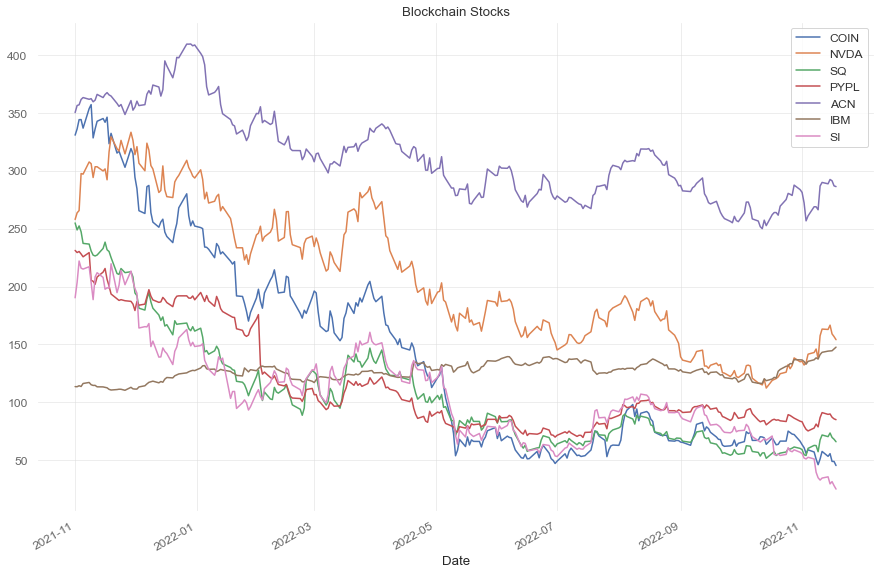

In [19]:
for s in symbols: 
    df[s].plot(label = s, figsize = (15,10))
plt.title('Blockchain Stocks')
plt.legend()

In [20]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

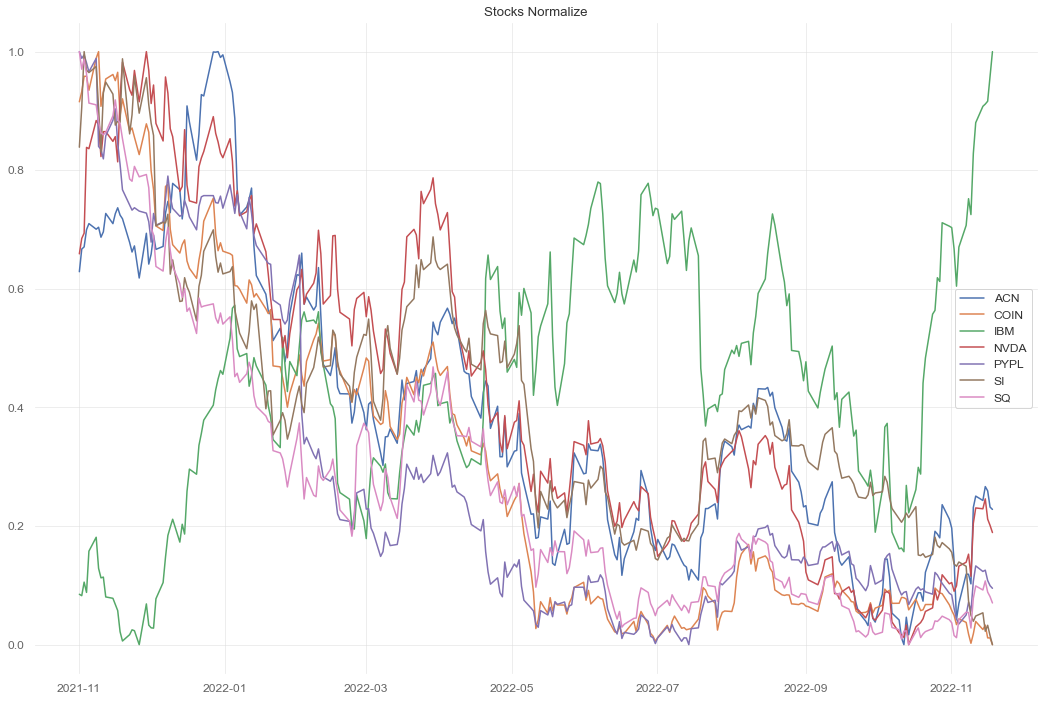

In [21]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title('Stocks Normalize')
plt.legend(labels=normalize.columns)

In [22]:
df.min()

ACN     250.070007
COIN     45.259998
IBM     110.337830
NVDA    112.269997
PYPL     69.550003
SI       24.900000
SQ       51.509998
dtype: float64

In [23]:
for s in symbols:
    print(s + ":",  df[s].max())

COIN: 357.3900146484375
NVDA: 333.49267578125
SQ: 255.0399932861328
PYPL: 231.27999877929688
ACN: 409.8289489746094
IBM: 147.63999938964844
SI: 222.1300048828125


In [24]:
# Creating a Return Data Frame for all individual stocks: 
returns = pd.DataFrame()
for s in symbols: 
    returns[s + " Return"] = df[s].pct_change().dropna()
    
returns.head(4)

,COIN Return,NVDA Return,SQ Return,PYPL Return,ACN Return,IBM Return,SI Return
Date,,,,,,,
2021-11-02 00:00:00-04:00,0.016164,0.022225,-0.023643,-0.007869,0.017393,-0.000792,0.069980
2021-11-03 00:00:00-04:00,0.023904,0.007462,0.013935,0.004009,0.001660,0.007529,0.090690
2021-11-04 00:00:00-04:00,0.000203,0.120423,-0.019883,-0.009376,0.012980,-0.005671,-0.027777
2021-11-05 00:00:00-04:00,-0.021484,-0.001644,-0.040734,-0.010691,0.004526,0.022838,-0.003704


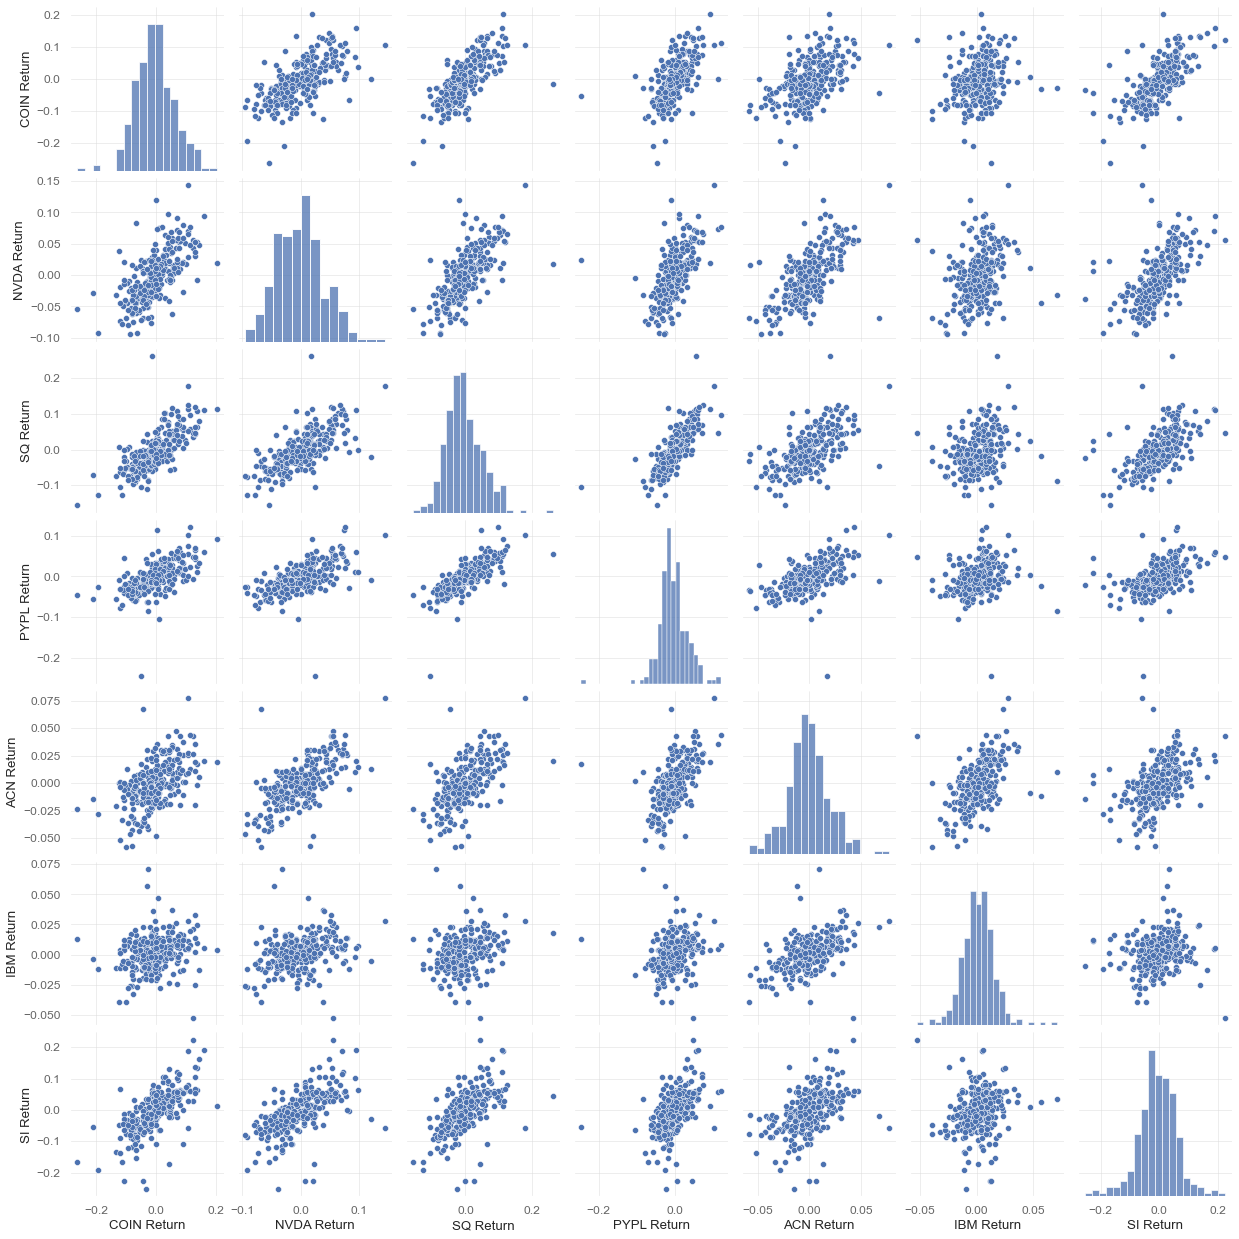

In [25]:
sns.pairplot(returns[1:])

<AxesSubplot:>

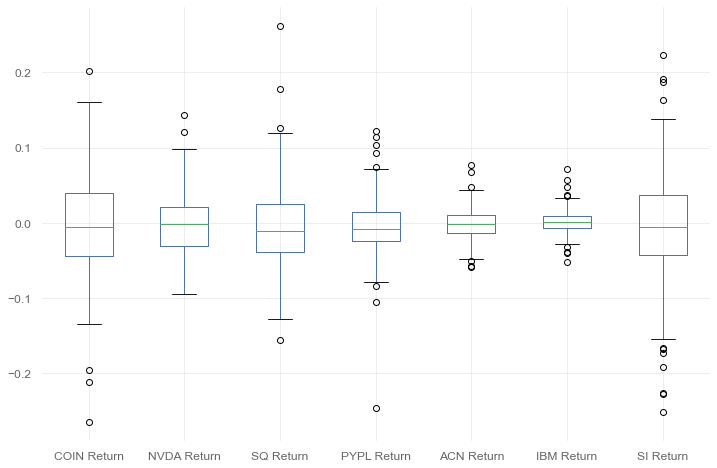

In [26]:
returns.plot(kind='box',figsize=(12,8))

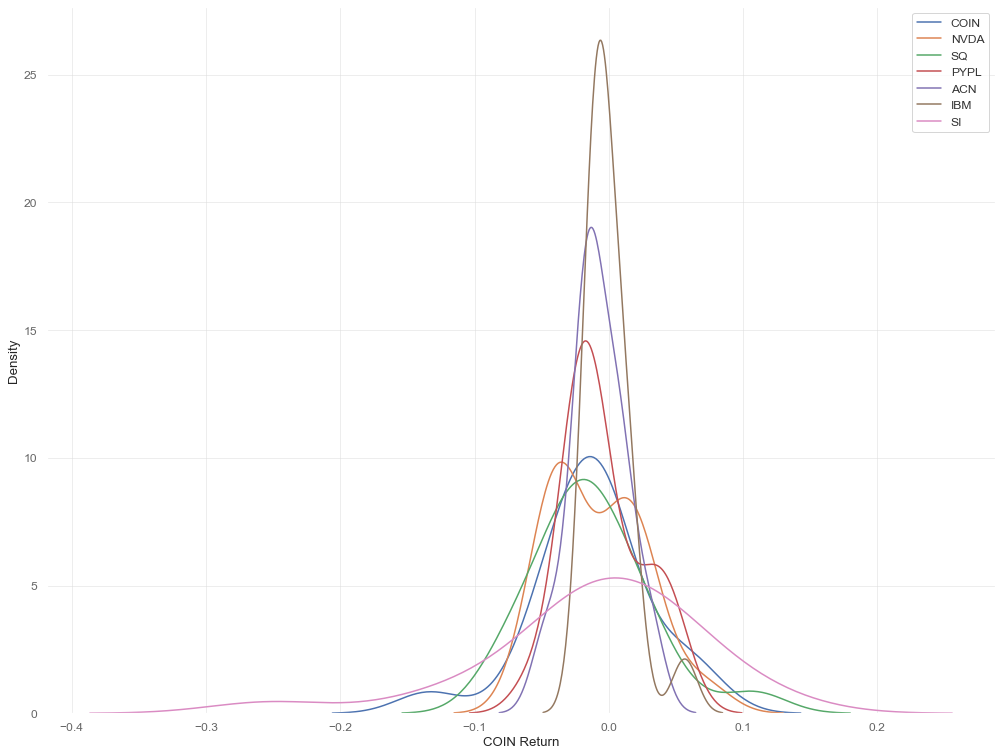

In [27]:
plt.figure(figsize=(17,13))

for r in returns:
    sns.kdeplot(returns.loc["2022-01-01" : "2022-01-31 "][r])
    plt.legend(labels=symbols)

In [28]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmax())

COIN Return   2022-08-03 00:00:00-04:00
NVDA Return   2022-11-10 00:00:00-05:00
SQ Return     2022-02-25 00:00:00-05:00
PYPL Return   2022-07-27 00:00:00-04:00
ACN Return    2022-11-10 00:00:00-05:00
IBM Return    2022-04-20 00:00:00-04:00
SI Return     2022-07-19 00:00:00-04:00
dtype: datetime64[ns, America/New_York]


In [29]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmin())

COIN Return   2022-05-11 00:00:00-04:00
NVDA Return   2022-09-13 00:00:00-04:00
SQ Return     2022-05-11 00:00:00-04:00
PYPL Return   2022-02-02 00:00:00-05:00
ACN Return    2022-05-18 00:00:00-04:00
IBM Return    2022-07-19 00:00:00-04:00
SI Return     2022-01-18 00:00:00-05:00
dtype: datetime64[ns, America/New_York]


In [30]:
returns.corr()

,COIN Return,NVDA Return,SQ Return,PYPL Return,ACN Return,IBM Return,SI Return
COIN Return,1.000000,0.646970,0.732474,0.601547,0.516866,0.210888,0.681870
NVDA Return,0.646970,1.000000,0.701863,0.605512,0.670620,0.293275,0.606854
SQ Return,0.732474,0.701863,1.000000,0.765779,0.596848,0.245838,0.586531
PYPL Return,0.601547,0.605512,0.765779,1.000000,0.553049,0.183384,0.477187
ACN Return,0.516866,0.670620,0.596848,0.553049,1.000000,0.491888,0.476926
IBM Return,0.210888,0.293275,0.245838,0.183384,0.491888,1.000000,0.156635
SI Return,0.681870,0.606854,0.586531,0.477187,0.476926,0.156635,1.000000


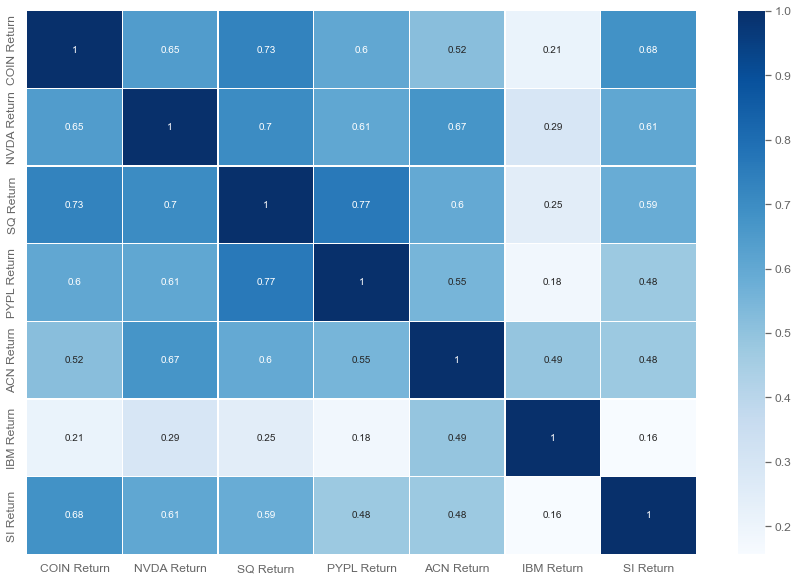

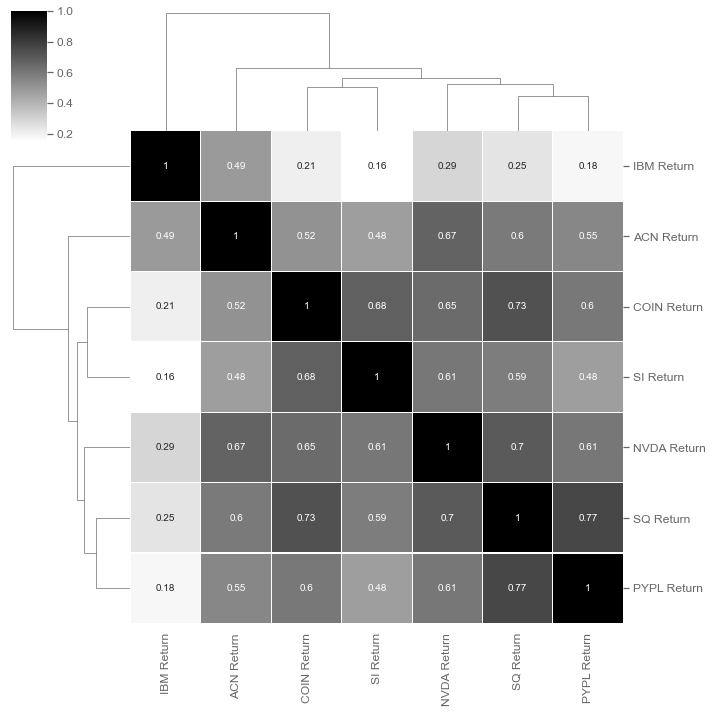

In [31]:
# Heatmap for return of all the stocks
plt.figure(figsize=(15,10))
sns.heatmap(returns.corr(), cmap="Blues",linewidths=.1, annot= True)


sns.clustermap(returns.corr(), cmap="binary",linewidths=.1, annot= True)

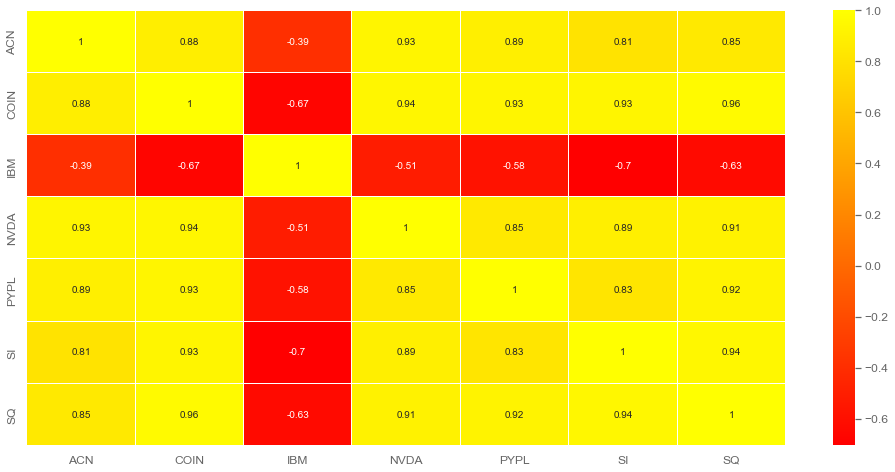

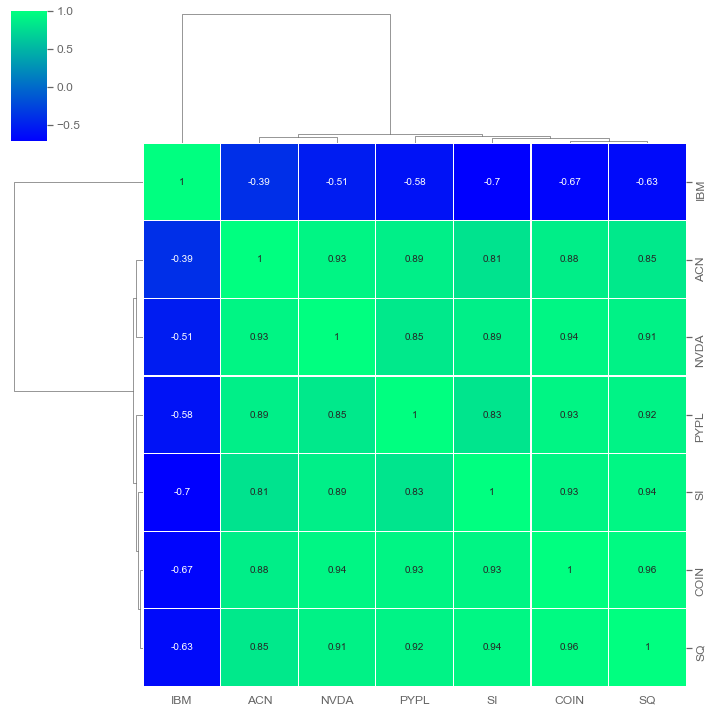

In [32]:
# heatmap for Adj. Close prices for all the stock
plt.figure(figsize = (17,8))
sns.heatmap(df.corr(), cmap="autumn",linewidths=.1, annot= True)


sns.clustermap(df.corr(), cmap="winter",linewidths=.1, annot= True)

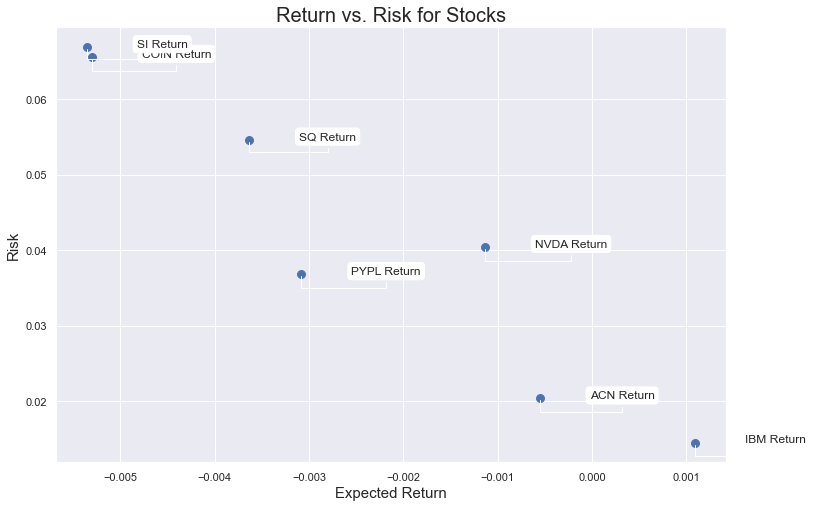

In [33]:
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(returns.mean(), returns.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(returns.columns, returns.mean(), returns.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [34]:
returns = df.pct_change().dropna()
mean = np.mean(returns)
std_dev = np.std(returns)

In [35]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

In [36]:
print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level    Value at Risk
------------------  ------------------------------------------------------------------------
90%                 [-0.02656989 -0.08922043 -0.01745188 -0.05282963 -0.0501703  -0.09092027
                     -0.07353679]
95%                 [-0.03394472 -0.11300956 -0.0227102  -0.06748442 -0.06351945 -0.11517645
                     -0.09335298]
99%                 [-0.04777868 -0.15763401 -0.03257393 -0.09497436 -0.08856024 -0.16067701
                     -0.13052486]


In [37]:
print('Value-at-Risk Confidence Level 90%:')
for i, x in zip(df.columns, VaR_90):
    print('{}: {}'.format(i, round(x,4)))

Value-at-Risk Confidence Level 90%:
ACN: -0.0266
COIN: -0.0892
IBM: -0.0175
NVDA: -0.0528
PYPL: -0.0502
SI: -0.0909
SQ: -0.0735


In [38]:
print('Value-at-Risk Confidence Level 90%:')

for i, x  in zip(df.columns, VaR_90):
    print('{}: ${}'.format(i, -round(x,2)*100000))

Value-at-Risk Confidence Level 90%:
ACN: $3000.0
COIN: $9000.0
IBM: $2000.0
NVDA: $5000.0
PYPL: $5000.0
SI: $9000.0
SQ: $7000.000000000001


In [39]:
print('Value-at-Risk Confidence Level 99%:')

for i, x  in zip(df.columns, VaR_99):
    print('{}: ${}'.format(i, -round(x,2)*100000))

Value-at-Risk Confidence Level 99%:
ACN: $5000.0
COIN: $16000.0
IBM: $3000.0
NVDA: $9000.0
PYPL: $9000.0
SI: $16000.0
SQ: $13000.0


In [40]:
qs.stats.sharpe(returns)

ACN    -0.433277
COIN   -1.283443
IBM     1.200776
NVDA   -0.445718
PYPL   -1.328590
SI     -1.271139
SQ     -1.055919
dtype: float64